In [ ]:
using PyPlot,JLD2,CALCEPH

In [2]:
println("test")

test


Using $\sqrt{e} \cos{\omega}$ and $\sqrt{e} \sin{\omega}$ as priors, doesnt work properly. don't know why. Reverted to previous prior $e \cos{\omega}$ and $e \sin{\omega}$

In [187]:
calc_deg(value) = value * 180/pi
calc_rad(value) = value * pi/180
function extract_data(filename)
	f = jldopen(String(filename), "r")
	return f["pbest_global"]
end
function evec(ecc,om)
    omega = calc_rad(om)
    ecosw = ecc*cos(omega)
    esinw = ecc*sin(omega)
    return ecosw,esinw
end

evec (generic function with 1 method)

## Posterior Distributions

In [202]:
mu_1,P_1,t01,e1cosw1,e1sinw1,
mu_2,P_2,t02,e2cosw2,e2sinw2,
mu_3,P_3,t03,e3cosw3,e3sinw3,
tmaxsinphi0,tmaxcosphi0,deltaphi = extract_data("OUTPUTS/moon_fittry1params.jld2")

18-element Array{Float64,1}:
    2.5275788989834023e-6
  224.70077098675895     
    2.433503768851615e6  
    0.00285673419852034  
    0.0007550609482464021
    3.04375001408466e-6  
  365.25646214139175     
    2.433624407402546e6  
    0.015037015083073492 
    0.0029763518560029555
    0.000941720902889919 
 4309.232984673987       
    2.443388213396815e6  
    0.02441377873531106  
   -0.03777031122605469  
    9.295524225689489e-5 
   -0.0016399728262300934
    2.312317961379825    

In [203]:
@load("NYR40/moon_try1mcmc.jld2")

8-element Array{Symbol,1}:
 :par_mcmc    
 :lprob_mcmc  
 :param       
 :nwalkers    
 :nsteps      
 :accept      
 :iburn       
 :indepsamples

In [2]:
include("decompose_ttvs.jl")
include("plot_ttvs.jl")
include("plot_likelihood.jl")
include("corner_plot.jl")

corner_planet (generic function with 1 method)

In [193]:
evec(0.00677323,131.53298)

(-0.004490997226230397, 0.005070265135758768)

Simulated with σ= 30 seconds


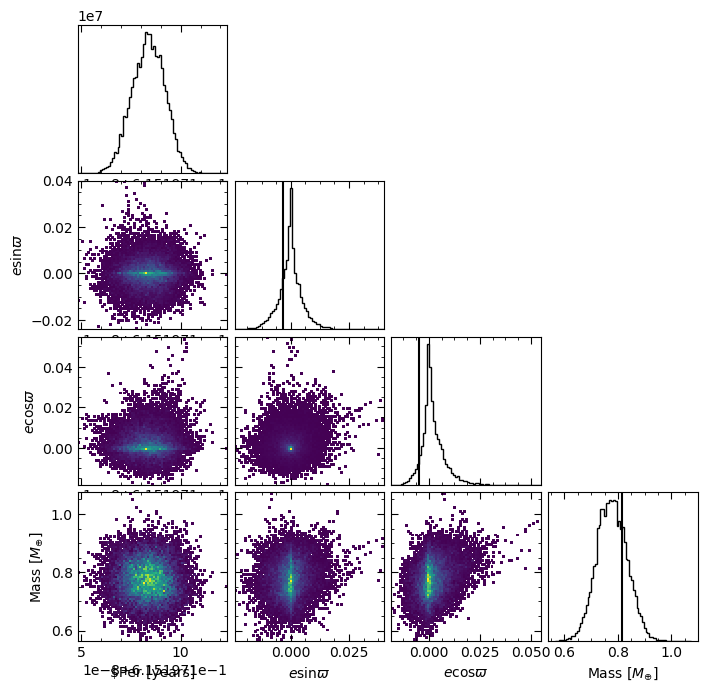

P-off-224.08550274004108
-0.004975858997178902<-ecos & esin->-0.003352734293109698


In [78]:
include("corner_plot.jl")
corner_planet(mcmc,30,75,"venus")

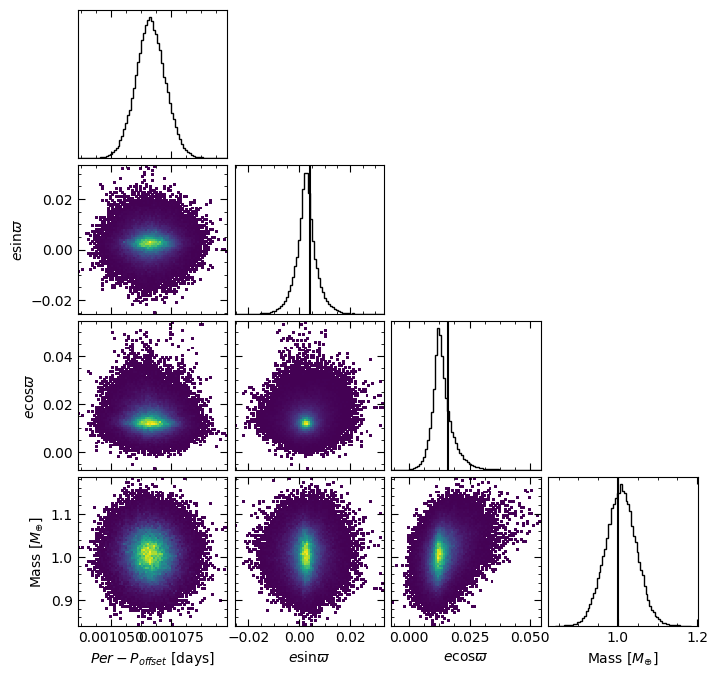

Simulated with σ= 30 seconds
P-offset0.0009999999999763531
0.016107124052845066<-ecos & esin->0.004410278307120753


In [76]:
corner_planet(mcmc,30,75,"earth")

Simulated with σ= 30 seconds


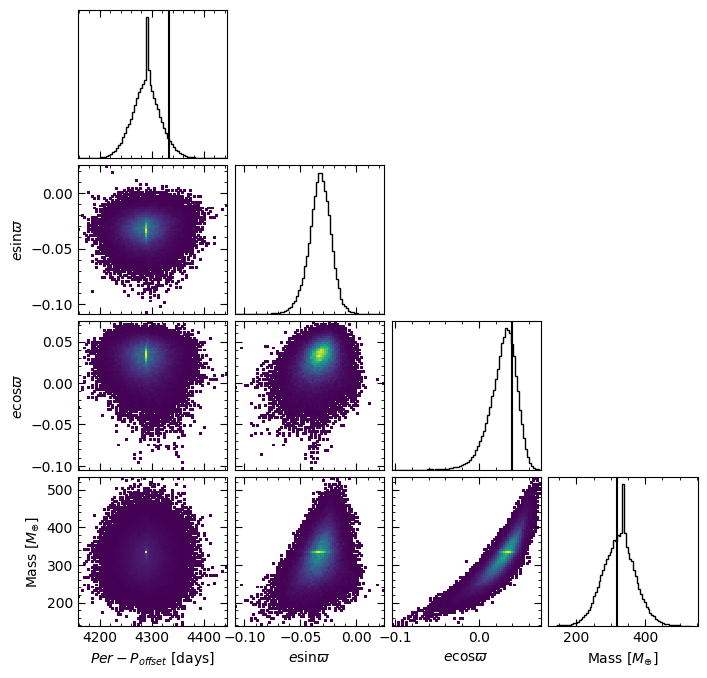

P-offset4332.82012875
0.04010139295881334<-ecos & esin->0.026379504975697257


In [77]:
corner_planet(mcmc,30,75,"jup")

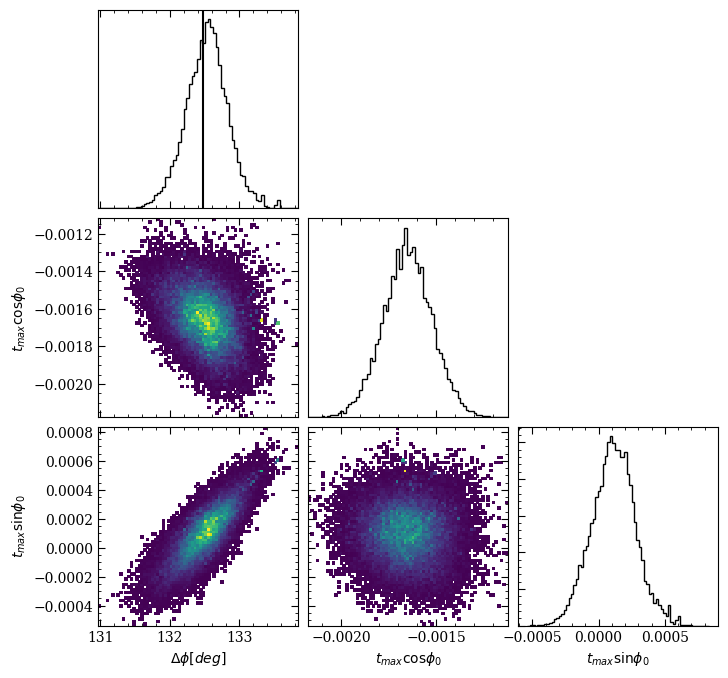

In [174]:
corner_moon(vec(par_mcmc[:,iburn:nsteps,16]),
    vec(par_mcmc[:,iburn:nsteps,17]),
    vec(par_mcmc[:,iburn:nsteps,18]).*57.2957795,75,
 0.00001,0.00001,2.3122.*57.2957795,"moon")

Using original prior on eccentricity.

In [108]:
tt,tt0,sigtt,ttmodel = g["tt"],g["tt0"],g["sigtt"],g["ttmodel"]
pbest_global = g["pbest_global"]
nplanet,ntrans = g["nplanet"],g["ntrans"]
pair_ttvs = decompose_ttvs(nplanet,ntrans,pbest_global) .* (24 * 60)
n1,n2,n3 = ntrans
mu1,P1,t01,ecosw1,esinw1 = pbest_global[1:5]
mu2,P2,t02,ecosw2,esinw2 = pbest_global[6:10]
mu3,P3,t03,ecosw3,esinw3 = pbest_global[11:15]
time1 = collect(t01 .+ range(0,stop=n1-1,length=n1) .* P1)
time2 = collect(t02 .+ range(0,stop=n2-1,length=n2) .* P2)
tt1 = tt[1:n1]
tt2 = tt[n1+1:n1+n2];

In [194]:
calc_rad(value) = value * pi/180
calc_deg(value) = value * 180/pi
calc_omega(pomega,Omega) = pomega - Omega
function calc_L(t,t0,P,esinw)
    lambda = (360/P .* (t.-t0)) .+ 2*esinw
    return lambda
end

calc_L (generic function with 1 method)

In [197]:
(J2000-t01)/P1 , (J2000-t02)/P2 , (J2000-t03)/P3

(80.29002775086454, 49.06304030994849, 1.8868486203603383)

In [195]:
calc_rad(80.29002775086454)

1.4013253407702035

$L \equiv \lambda$. Check to see if $\lambda_{E} \sim \lambda_{V}$ at their respective transit times. $\lambda mod 2 \pi = \lambda_{obs}$[what?] where $\lambda_{obs}$ is longitude that both Earth and Venus have.
true $\lambda$ from planet body data sheet: 181.9, 100, 34 degrees

In [117]:
J2000 = 2451545.0

w1 = calc_deg(atan(esinw1,ecosw1))
w2 = calc_deg(atan(esinw2,ecosw2))
w3 = calc_deg(atan(esinw3,ecosw3))
w1,w2,w3


(-2.9189684831965503, 9.176444742981595, -49.05234032359363)

In [174]:
L_1 = calc_L(tt1,t01,P1,esinw1)
L_2 = calc_L(tt2,t02,P2,esinw2)
# L_3 = calc_L(tt1,t03,P3,esinw3)
L_1,L_2

([-0.0024015066329488737, 359.9985750809026, 720.002237747706, 1079.9988220219257, 1439.9975087045038, 1800.0023024714983, 2160.003065197765, 2520.001219974129, 2879.99523518333, 3239.9960618528166  …  20159.996734479737, 20520.00259574987, 20880.004040825617, 21240.001734749592, 21599.99690140452, 21959.996235769864, 22320.003691815633, 22680.00261636066, 23039.998502659375, 23399.99704485963], [0.007723420943177829, 360.00448338910394, 720.0080964117075, 1080.0025614570113, 1440.0057495061735, 1800.0082994721358, 2160.0012984270165, 2520.0033907012057, 2880.0039854453016, 3240.001757352988  …  11160.001174038334, 11520.005288894095, 11880.00215863628, 12240.007783503548, 12600.006956778676, 12960.00540622818, 13320.008568061554, 13680.003907554395, 14040.00452694739, 14400.008357562872])

In [152]:
28904.409642330258-28722.430890811236

181.9787515190219

In [153]:
17662.6994287092-17562.229939921457

100.46948878774128

In [154]:
679.195296805864-644.8690628197218

34.326233986142256

Venus transit occurs 0.277 radians after it goes through periastron. Earth transit occurs -0.552 radians after it goes through periastron

In [115]:
L_1+w1,L_2+w2,L_3+w3

(-2.9193164641747487, 9.181361870724214, -728.3880501771732)

In [193]:
Dw1 = (((360/P1) .* (t01.- J2000)) .+ 181.97909950) + 360*80

77.56910918876383

In [192]:
Dw2 = ((360/P2) .* (t02 .- J2000) .+ 100.46457166) + 360*49.06304030994849

100.46457165999891

In [191]:
Dw3 = [(360/P3) .* (t03 .- J2000) .+ 34.39644051,(360/P3) .* (t03 .- J2000) .+ 34.39644051 + 360*1,(360/P3) .* (t03 .- J2000) .+ 34.39644051 + 360*2]

3-element Array{Float64,1}:
 -644.8690628197218 
 -284.86906281972176
   75.13093718027824

## Likelihoods And Probabilities

In [2]:
f = jldopen("FITS/p3_fit30.0s40.0yrs.jld2","r")
g = jldopen("FITS/moon_fit30.0s40.0yrs.jld2","r")

JLDFile /Users/bethleelindor/work/washington/ttv_project/ttv_ss/FITS/moon_fit30.0s40.0yrs.jld2 (read-only)
 ├─🔢 pbest_p3
 ├─🔢 pbest_dp
 ├─🔢 lprob_p3
 ├─🔢 lprob_dp
 ├─🔢 lprob_best
 ├─🔢 pbest_global
 ├─🔢 ntrans
 ├─🔢 nplanet
 ├─🔢 tt0
 ├─🔢 tt
 ├─🔢 ttmodel
 ├─🔢 sigtt
 ├─🔢 p3in
 ├─🔢 p3out
 ├─🔢 np3
 ├─🔢 nphase
 ├─🔢 dpin
 ├─🔢 dpout
 └─🔢 ndp

In [26]:
mcmc = jldopen("MCMC/p3_mcmc30.0s40.0yrs.jld2")
moon = jldopen("MCMC/moon_mcmc30.0s40.0yrs.jld2")

JLDFile /Users/bethleelindor/work/washington/ttv_project/ttv_ss/MCMC/moon_mcmc30.0s40.0yrs.jld2 (read-only)
 ├─🔢 par_mcmc
 ├─🔢 lprob_mcmc
 ├─🔢 param
 ├─🔢 nwalkers
 ├─🔢 nsteps
 ├─🔢 accept
 ├─🔢 iburn
 └─🔢 indepsamples

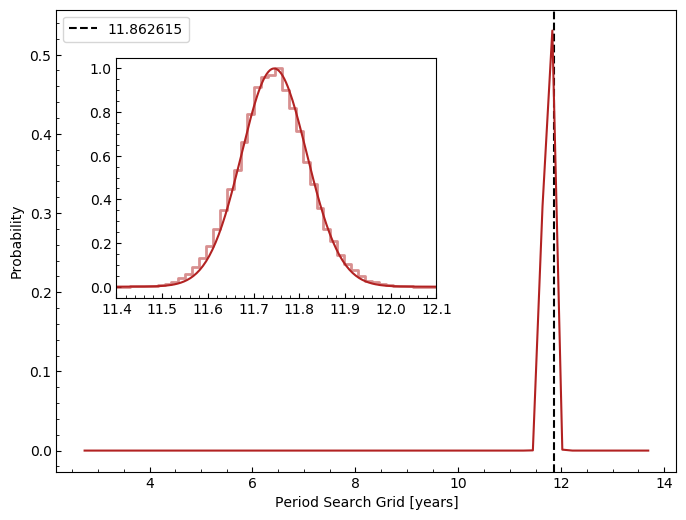

In [80]:
include("plot_likelihood.jl")
plot_likelihood(f,mcmc,false)

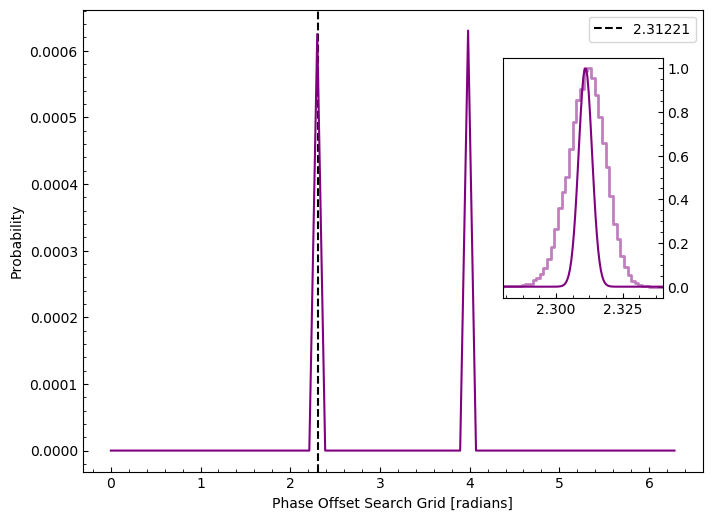

In [79]:
include("plot_likelihood.jl")
plot_likelihood(g,moon,true)

jupiter period agreement --> unique solution & not degenerate

In [44]:
using Distributions,Optim

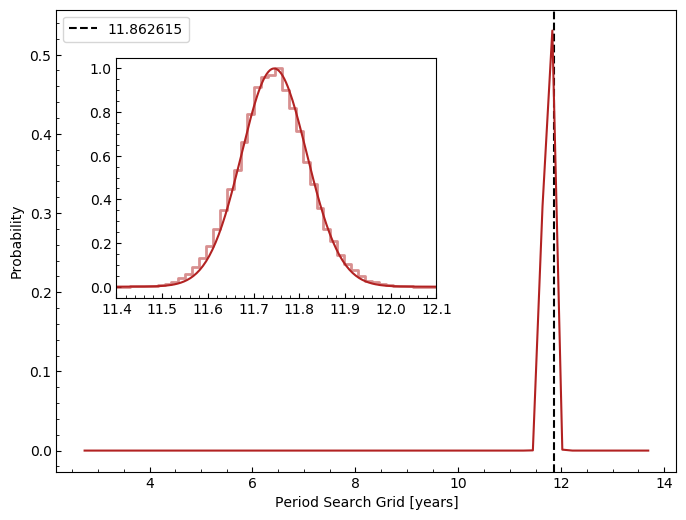

In [45]:
include("plot_likelihood.jl")
plot_likelihood(f,mcmc,false)

include("plot_orbits.jl")
plot_orbits(3,false)

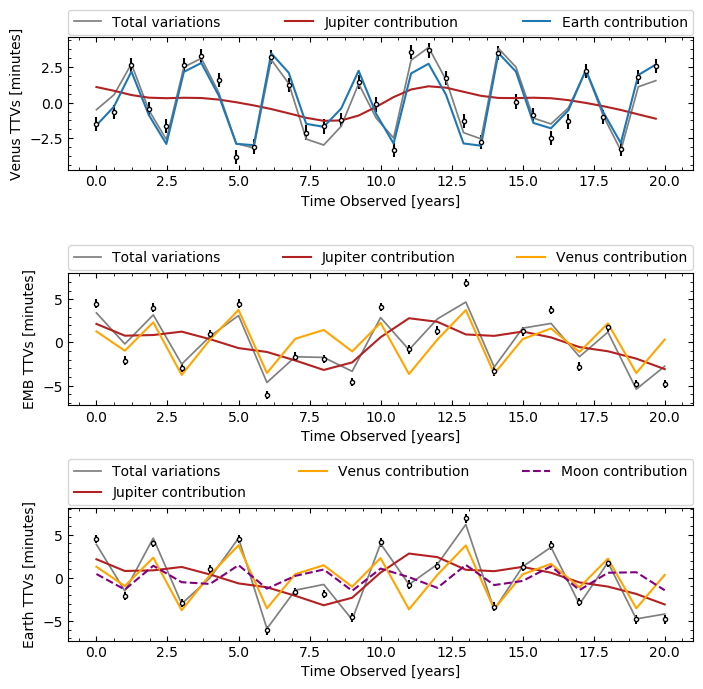

Simulated with σ= 30 seconds


In [59]:
f3 = jldopen("FITS/p3_fit30.0s20.0yrs.jld2","r")
g3 = jldopen("FITS/moon_fit30.0s20.0yrs.jld2","r")
plot_ttvs(g3,30,true)

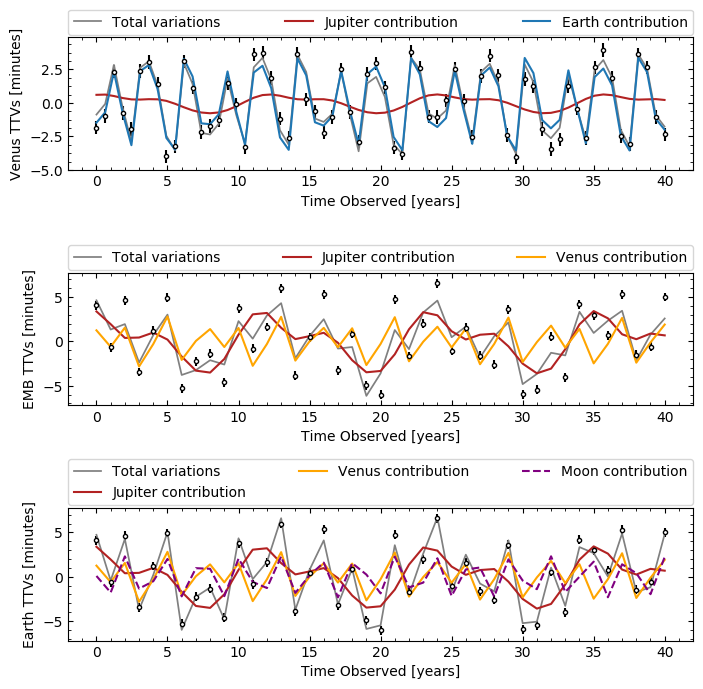

Simulated with σ= 30 seconds


In [81]:
include("plot_ttvs.jl")
plot_ttvs(g,30,true)
# savefig("IMAGES/EMBttvs.eps")

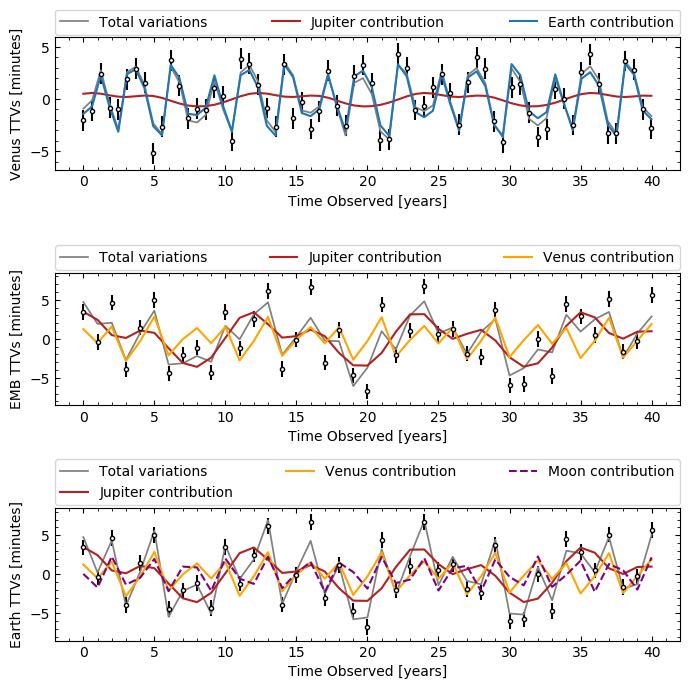

Simulated with σ= 60 seconds


In [58]:
include("plot_ttvs.jl")
f6 = jldopen("FITS/p3_fit60.0s40.0yrs.jld2","r")
g6 = jldopen("FITS/moon_fit60.0s40.0yrs.jld2","r")
plot_ttvs(g6,60,true)